<a href="https://colab.research.google.com/github/Benned-H/Summer2019/blob/master/%22HandsFree%20Vision%22/Image_Selection_Box.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

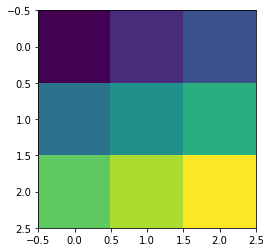

In [2]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]])
plt.imshow(a)

In [3]:
sp.misc.imsave('outfile.jpg', a)

AttributeError: ignored

It looks like SciPy deprecated their image I/O before I ever used it. Thus I'll try a few different options for speed:

In [0]:
import imageio
import matplotlib

In [0]:
matplotlib.image.imsave('mat.png', a)

In [6]:
!ls

mat.png  sample_data


In [24]:
import IPython.display
IPython.display.Image("mat.png", width=200, height=200)

In [0]:
# We'll want a 3D array for images in RGB or RGBA: 2D pixels, each pixel a vector.
height = 22
width = 52

RGB_image = np.zeros([height,width,3], dtype=np.uint8) # Datatype is 0 to 255.
RGBA_image = np.zeros([height,width,4], dtype=np.uint8)

In [0]:
# Goal: Make a red outline on the RGBA image.
transparency = 255
RGBA_image[0,:] = [255,0,0,transparency]
RGBA_image[height-1,:] = [255,0,0,transparency]
RGBA_image[:,0] = [255,0,0,transparency]
RGBA_image[:,width-1] = [255,0,0,transparency]

In [0]:
import PIL.Image
img = PIL.Image.fromarray(RGBA_image)
img.save("RGBA_box.png")

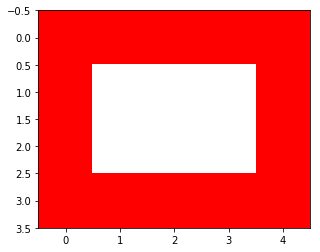

In [30]:
plt.imshow(img)

In [27]:
IPython.display.Image("RGBA_box.png")

## Testing Options

In [0]:
# Create our image
height = 22
width = 52
transparency = 255

RGBA_image = np.zeros([height,width,4], dtype=np.uint8)

# Fill in red outline
RGBA_image[0,:] = [255,0,0,transparency]
RGBA_image[height-1,:] = [255,0,0,transparency]
RGBA_image[:,0] = [255,0,0,transparency]
RGBA_image[:,width-1] = [255,0,0,transparency]

In [0]:
# Saving the image options:

img = PIL.Image.fromarray(RGBA_image)
img.save("RGBA_PIL.png")

matplotlib.image.imsave("RGBA_MAT.png", RGBA_image)

In [44]:
IPython.display.Image("RGBA_PIL.png")

In [45]:
IPython.display.Image("RGBA_MAT.png")

In [0]:
import time

# Framework for below testing:
start = time.time()
end = time.time()
diff = end - start

In [0]:
def create_Box(dim):
  rgba = np.zeros([dim,dim,4], dtype=np.uint8)

  # Fill in red outline
  rgba[0,:] = [255,0,0,255]
  rgba[dim-1,:] = [255,0,0,255]
  rgba[:,0] = [255,0,0,255]
  rgba[:,dim-1] = [255,0,0,255]
  
  return rgba

In [67]:
dimensions = range(1,600)
pil = []
mat = []

for dim in dimensions:
  if dim % 100 == 0:
    print(dim)
  box0 = create_Box(dim)
  start = time.time()
  img = PIL.Image.fromarray(box0)
  img.save("RGBA_PIL.png")
  end = time.time()
  diff = end - start
  pil.append(diff)
  
  box1 = create_Box(dim)
  start = time.time()
  matplotlib.image.imsave("RGBA_MAT.png", box1)
  end = time.time()
  diff = end - start
  mat.append(diff)

100
200
300
400
500


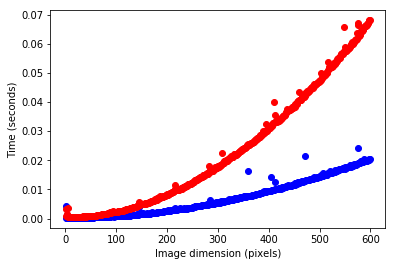

In [71]:
plt.plot(dimensions, pil, "bo") # PIL is blue.
plt.plot(dimensions, mat, "ro") # Matplotlib is red.
plt.xlabel("Image dimension (pixels)")
plt.ylabel("Time (seconds)")
plt.show()

So there we have it, *we should use the above format of PIL image export for our code*. Great to know. Full code:

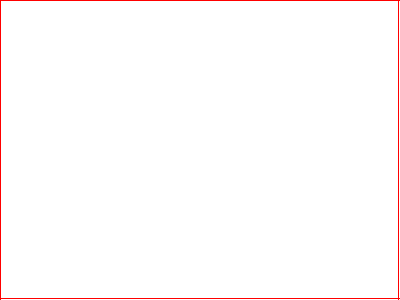

In [87]:
import PIL.Image
import IPython.display

def createBox(h,w,border=1):
  rgba = np.zeros([h,w,4], dtype=np.uint8)

  # Fill in red outline
  rgba[0:border,:] = [255,0,0,255]
  rgba[h-border-1:h-1,:] = [255,0,0,255]
  rgba[:,0:border] = [255,0,0,255]
  rgba[:,w-border-1:w-1] = [255,0,0,255]
  
  return rgba

rgba_final = createBox(300,400)
img = PIL.Image.fromarray(rgba_final)
img.save("final.png")

IPython.display.Image("final.png")